In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Load the dataset
data = pd.read_csv('/content/tested.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Drop rows with missing values in Title or Text, handling potential case mismatch
data = data.dropna(subset=[col for col in ['Title', 'Text'] if col in data.columns])

# Print the available columns to verify names
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Drop columns that won’t be used in the model, if they exist in the dataset
columns_to_drop = ['Cabin', 'Name', 'Ticket']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Fill missing values in the 'Age' column with the median (if 'Age' column exists)
if 'Age' in data.columns:
    data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing values in the 'Embarked' column with the mode (if 'Embarked' column exists)
if 'Embarked' in data.columns:
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Display the dataset after handling missing values
data.head()


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<ipython-input-17-4f94ce791bc5>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-17-4f94ce791bc5>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [ ]:
# Encode 'Sex' column (Female = 0, Male = 1)
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

# Encode 'Embarked' column using one-hot encoding
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)


In [ ]:
# Define features (X) and target (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Identify and encode any remaining categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Display the data types to confirm all features are numeric
print("Data types after encoding:\n", X.dtypes)

# Re-split the data into training and testing sets with the updated X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

try:
    model.fit(X_train, y_train)
    print("Model trained successfully.")
except Exception as e:
    print("Error during model training:", e)

Data types after encoding:
 PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_Q        bool
Embarked_S        bool
dtype: object
Model trained successfully.


Predictions generated successfully.
Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



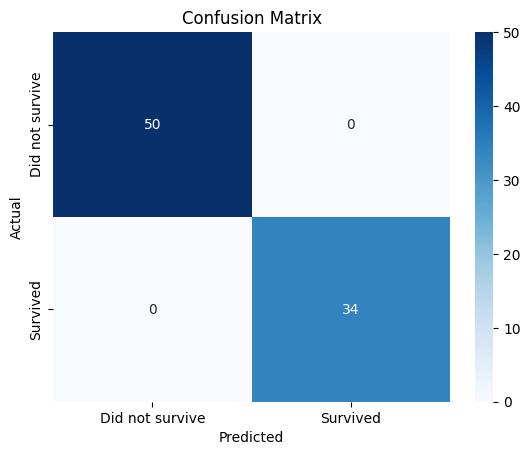

In [ ]:
#  Model Evaluation with Debugging Information

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions and check if there are any errors
try:
    y_pred = model.predict(X_test)
    print("Predictions generated successfully.")
except Exception as e:
    print("Error during prediction:", e)

# Step 2: Calculate accuracy and check if there are any errors
try:
    accuracy = accuracy_score(y_test, y_pred)
    print("Model Accuracy:", accuracy)
except Exception as e:
    print("Error during accuracy calculation:", e)

# Step 3: Display the classification report and check for errors
try:
    print("Classification Report:\n", classification_report(y_test, y_pred))
except Exception as e:
    print("Error during classification report generation:", e)

# Step 4: Plot the confusion matrix and handle potential errors
try:
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Did not survive', 'Survived'],
                yticklabels=['Did not survive', 'Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
except Exception as e:
    print("Error during confusion matrix plot:", e)


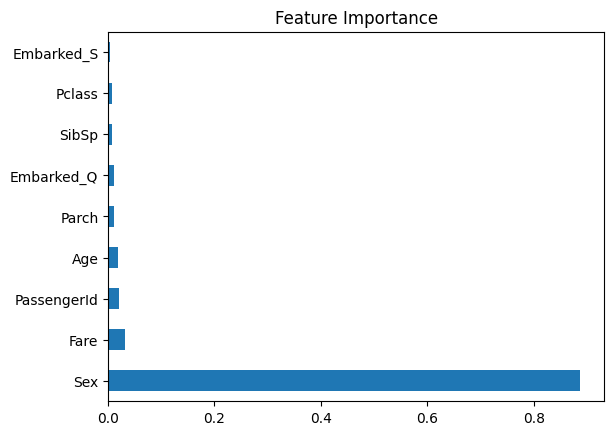

In [ ]:
# Plot feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'titanic_survival_model.pkl')


['titanic_survival_model.pkl']